In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
opportunities = pd.read_excel("shared_data_read_only/Opportunities.xlsx")
invoice_opportunities = pd.read_excel("shared_data_read_only/Invoice and Opportunities.xlsx")

In [16]:
opportunities

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment amount 3,Theorical payment date 4,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487,SDLV
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940,SDLV
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520,SDLV
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT,SDLV


In [17]:
invoice_opportunities = invoice_opportunities.set_index("Date")
invoice_opportunities.sort_index(inplace=True)
print(invoice_opportunities)

               Type Reference Nbr. Customer     Amount  Opportunity ID
Date                                                                  
2020-01-01  Invoice      FC0000010   C00621  350000.00              76
2020-03-29  Invoice      FC0000007   C00589    3000.00            1056
2020-04-28  Invoice      FC0000205   C00036     209.08               6
2020-05-07  Invoice      FC0000209   C01533  436988.09            1666
2020-08-20  Invoice      FC0000734   C01334    1478.40            2285
...             ...            ...      ...        ...             ...
2023-10-06  Invoice      FC0004597   C00451   15000.00            4295
2023-10-06  Invoice      FC0004605   C19104   83954.00            5708
2023-10-09  Invoice      FC0004598   C01196   54531.00            5829
2023-10-09  Invoice      FC0004607   C01388  241253.00            1863
2023-10-10  Invoice      FC0004608   C06507    5000.00            4504

[3238 rows x 5 columns]


In [18]:
month_invoices = invoice_opportunities.groupby([lambda x: x.year, lambda x: x.month]).sum()
month_invoices

Amount  Opportunity ID
Date Date                            
2020 1      350000.00              76
     3        3000.00            1056
     4         209.08               6
     5      436988.09            1666
     8        1478.40            2285
2021 1      283466.91           19540
     2     1236812.39           68361
     3     2923682.43          155450
     4     1009514.52           81575
     5     2053851.04          481862
     6      966967.21          280847
     7     1953172.66          169652
     8      909884.98           79623
     9     1540729.04          168293
     10    1858788.91          124300
     11    1059356.92          271128
     12    3072087.62          402743
2022 1     2048557.68          204934
     2     2289052.26          161932
     3     1157145.02          284884
     4      996524.20          354398
     5     1856440.09         1222990
     6     2240583.42          601388
     7     1340618.95          348154
     8      793745.60          132305
     9     1578243.48          300936
     10    1185796.52          343761
     11    2861128.78          619266
     12    1806621.86          554677
2023 1     1024514.16          415916
     2     1238192.27          242555
     3     1814223.80          263039
     4     2133380.18          542546
     5     1493330.72          358364
     6     2209206.63          511911
     7     3475586.67          456354
     8     1368857.00          239674
     9     2485528.55          392544
     10     495770.00           69219

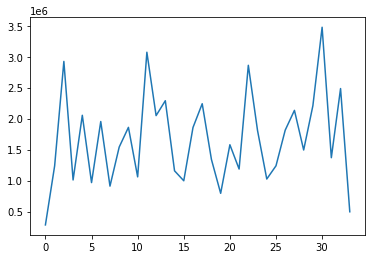

In [19]:
month_invoices = month_invoices[5:]
plt.plot(month_invoices["Amount"].values)

In [20]:
consumer_price_index = pd.read_excel("shared_data_read_only/consumer_price_index.xlsx")
consumer_price_index = consumer_price_index[24:]
print(consumer_price_index)
print(month_invoices)

         Date  consumer_price_index
24 2021-01-01                105.12
25 2021-02-01                105.12
26 2021-03-01                105.75
27 2021-04-01                105.86
28 2021-05-01                106.20
29 2021-06-01                106.34
30 2021-07-01                106.40
31 2021-08-01                107.05
32 2021-09-01                106.81
33 2021-10-01                107.25
34 2021-11-01                107.64
35 2021-12-01                107.85
36 2022-01-01                108.12
37 2022-02-01                108.94
38 2022-03-01                110.49
39 2022-04-01                110.97
40 2022-05-01                111.72
41 2022-06-01                112.55
42 2022-07-01                112.87
43 2022-08-01                113.38
44 2022-09-01                112.74
45 2022-10-01                113.90
46 2022-11-01                114.26
47 2022-12-01                114.16
48 2023-01-01                114.60
49 2023-02-01                115.78
50 2023-03-01               

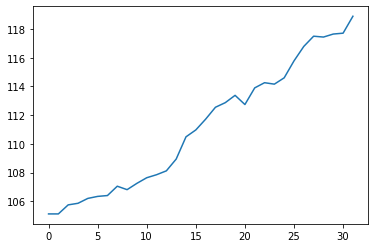

In [21]:
plt.plot(consumer_price_index["consumer_price_index"].values)

In [41]:
cpi_pct = consumer_price_index["consumer_price_index"].pct_change()[1:]
invoices_pct = month_invoices["Amount"][:-2].pct_change()[1:]

In [42]:
print(np.corrcoef(cpi_pct, invoices_pct))

[[ 1.         -0.29565145]
 [-0.29565145  1.        ]]


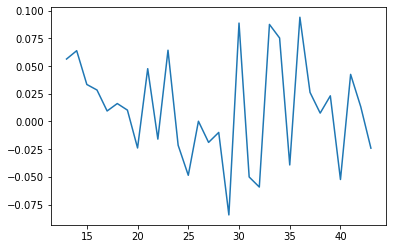

In [45]:
CAC = pd.read_csv("shared_documents/^FCHI.csv")
CAC_ts = CAC["Close"].pct_change()[13:]
plt.plot(CAC_ts)

In [48]:
print(np.corrcoef(CAC_ts, invoices_pct))
print(np.corrcoef(CAC_ts, cpi_pct))

[[1.         0.27077992]
 [0.27077992 1.        ]]
[[1.         0.09958588]
 [0.09958588 1.        ]]


Linear Regression

In [115]:
from sklearn.linear_model import Ridge
y = invoices_pct
d = {'CAC': CAC_ts.values, 'CPI': cpi_pct.values} 
X = pd.DataFrame(d)
ridge = Ridge(alpha=1.0)
ridge_fit = ridge.fit(X , y)
# Basic Ridge but to forecast we need to know CAC change and CPI change

ARIMA model

In [116]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(serie):
    result=adfuller(serie)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary ")

In [117]:
adfuller_test(invoices_pct)

ADF Test Statistic : -5.009813383380129
p-value : 2.122178482260018e-05
#Lags Used : 3
Number of Observations Used : 27
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


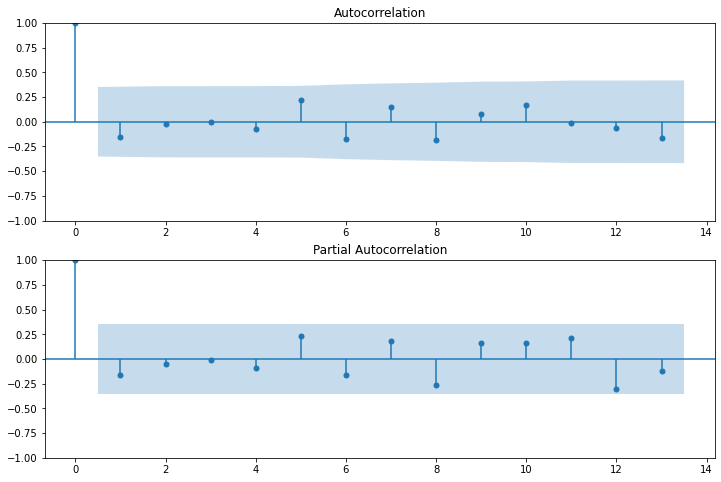

In [95]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(invoices_pct,lags=13,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(invoices_pct,lags=13,ax=ax2)

Remarques : pas d'autocorrelation à un certain ordre significatif, ni d'autocorrelation partielles significative. Ainsi, bien que la série soit stationnaire, il est compliqué de faire des prédictions sur cette série. Le meilleure ARIMA est un ARIMA(0, 0, 0) donc a série est considérée comme un bruit blanc

In [118]:
import warnings
warnings.filterwarnings("ignore")
"""
min_aic = 1000000
res = (0, 0, 0)
for p in range(12):
    for d in range(12):
        model = ARIMA(series, order=(p,d,0))
        model_fit = model.fit()
        if model_fit.aic < min_aic:
            min_aic = model_fit.aic
            res = (p, d, 0)
"""
res = (1, 0, 0)

In [111]:
print(res)

(1, 0, 0)


                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                   31
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -39.382
Date:                Fri, 20 Oct 2023   AIC                             84.764
Time:                        13:02:54   BIC                             89.066
Sample:                             0   HQIC                            86.166
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2817      0.183      1.543      0.123      -0.076       0.640
ar.L1         -0.2634      0.114     -2.311      0.021      -0.487      -0.040
sigma2         0.7412      0.164      4.511      0.0

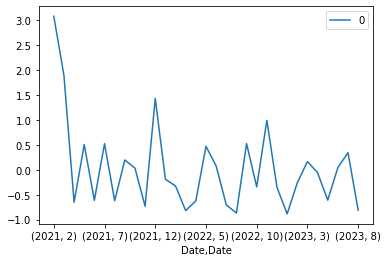

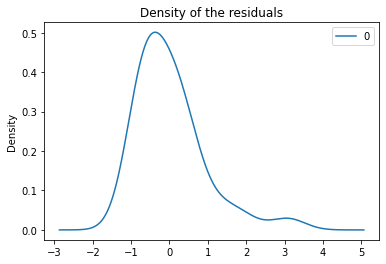

               0
count  31.000000
mean    0.026184
std     0.887243
min    -0.885914
25%    -0.623234
50%    -0.188747
75%     0.406979
max     3.081422


In [112]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

series = invoices_pct
# fit model
model = ARIMA(series, order=res)
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.title("Density of the residuals")
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [113]:
model_fit.forecast()

31    0.515572
dtype: float64

<AxesSubplot:>

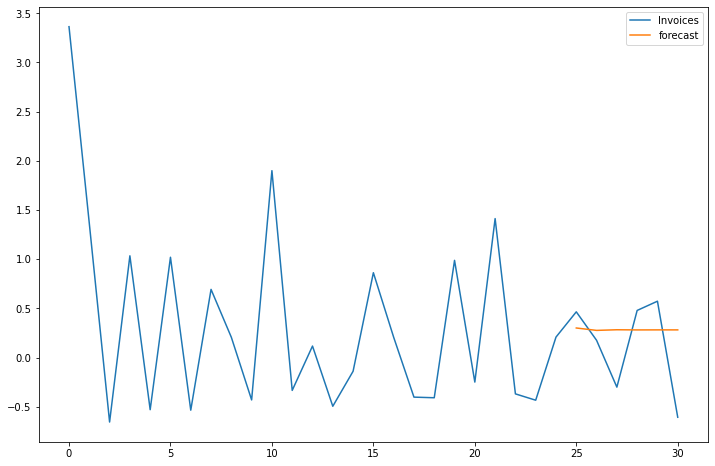

In [114]:
d = {'Invoices': invoices_pct.values} 
df = pd.DataFrame(d)
df['forecast']=model_fit.predict(start=25, end=31,dynamic=True)
df[['Invoices','forecast']].plot(figsize=(12,8))